In [ ]:
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

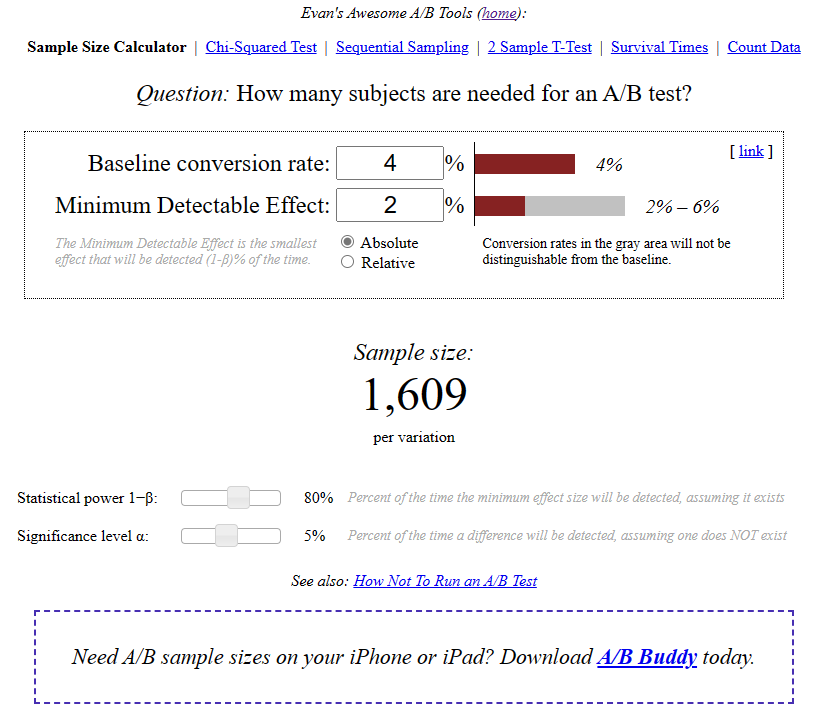

# TPR

In [ ]:
# Проверяем статистический тест c помощью метода Монте-Карло
n = 100_000 # проводим тест 100 000 раз для метода Монте-Карло
result = []
for _ in range(n):
  a = np.random.binomial(1, 0.04, 1609).sum()
  b = np.random.binomial(1, 0.06, 1609).sum()
  # MDE = 2%
  result.append((a, b))

df = pd.DataFrame(result, columns=["a", "b"])
df

,a,b
0,72,106
1,68,110
2,73,113
3,69,80
4,64,108
...,...,...
99995,62,102
99996,72,94
99997,72,81
99998,63,100


In [ ]:
def test(conv_a,conv_b,size_a,size_b,significance=0.05):
  _, p_value = proportions_ztest([conv_a, conv_b],
                                 [size_a, size_b],
                                 alternative='two-sided')
  return p_value < significance

df['test_result'] = df.apply(lambda row: test(row["a"], row["b"], 2312, 2312), axis=1)

In [ ]:
df['test_result'].mean()

0.73552

# FPR

In [ ]:
# Проверяем статистический тест c помощью метода Монте-Карло
n = 100_000 # проводим тест 1000 раз для метода Монте-Карло
result = []
for _ in range(n):
  a = np.random.binomial(1, 0.04, 1609).sum()
  b = np.random.binomial(1, 0.04, 1609).sum()
  result.append((a, b))

df = pd.DataFrame(result, columns=["a", "b"])
df

,a,b
0,55,58
1,57,65
2,77,67
3,63,64
4,52,71
...,...,...
99995,69,72
99996,64,59
99997,72,65
99998,79,51


In [ ]:
def test(conv_a,conv_b,size_a,size_b,significance=0.05):
  _, p_value = proportions_ztest([conv_a, conv_b],
                                 [size_a, size_b],
                                 alternative='two-sided')
  return p_value < significance

df['test_result'] = df.apply(lambda row: test(row["a"], row["b"], 2312, 2312), axis=1)

In [ ]:
df['test_result'].mean()

0.04791